In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [11]:
# Create dates from Jan 2020 to Dec 2021
dates = pd.date_range(start='2020-01-01', end='2021-12-31', freq='ME')
dates

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [7]:
np.random.seed(42)  # For consistent results

data = pd.DataFrame({
    "Date": dates,
    "Total_Cases": np.random.randint(50000, 1000000, len(dates)),         # COVID cases
    "Unemployment_Rate": np.random.uniform(4, 12, len(dates)),            # %
})

# Fake stock index: related to cases and unemployment, with noise
data["Stock_Index"] = (
    5000 
    - 0.002 * data["Total_Cases"] 
    - 100 * data["Unemployment_Rate"] 
    + np.random.normal(0, 50, len(dates))   # some noise
)


In [9]:
data

,Date,Total_Cases,Unemployment_Rate,Stock_Index
0,2020-01-31,171958,5.698713,4100.764412
1,2020-02-29,721155,5.454600,2980.452039
2,2020-03-31,181932,5.467236,4038.334782
3,2020-04-30,415838,6.433938,3516.842436
4,2020-05-31,309178,8.198051,3535.156415
5,2020-06-30,694167,7.455560,2865.833592
6,2020-07-31,160268,6.329833,4035.008165
7,2020-08-31,782180,8.894823,2565.625130
8,2020-09-30,104886,5.115951,4215.376956
9,2020-10-31,187337,6.337157,4046.209894


In [13]:
corr_matrix = data.corr()["Stock_Index"]
print(corr_matrix)

Date                -0.190200
Total_Cases         -0.950751
Unemployment_Rate   -0.642639
Stock_Index          1.000000
Name: Stock_Index, dtype: float64


In [15]:
X = data[["Total_Cases", "Unemployment_Rate"]]
y = data["Stock_Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [17]:
print(X_train)


    Total_Cases  Unemployment_Rate
1        721155           5.454600
13       962756           5.597390
23       377069           6.436910
16       328167           4.371603
8        104886           5.115951
6        160268           6.329833
17        91090           8.860359
4        309178           8.198051
2        181932           5.467236
5        694167           7.455560
18       379365           5.364193
9        187337           6.337157
7        782180           8.894823
19       114820           4.520413
3        415838           6.433938
0        171958           5.698713
21       371879          11.725056
15       241335           8.739317
12       949159          10.281408


In [19]:
print(y_train)

1     2980.452039
13    2558.837026
23    3646.558408
16    3945.190691
8     4215.376956
6     4035.008165
17    3904.877035
4     3535.156415
2     4038.334782
5     2865.833592
18    3637.516796
9     4046.209894
7     2565.625130
19    4274.289162
3     3516.842436
0     4100.764412
21    3090.457818
15    3564.233634
12    2084.473147
Name: Stock_Index, dtype: float64


In [21]:
print(X_test)

    Total_Cases  Unemployment_Rate
11       137498           7.648560
10       571430           6.930895
22       768315          10.467179
14       225203           8.113876
20       837201          11.591084


In [23]:
print(y_test)

11    4019.829999
10    3302.966177
22    2445.758261
14    3687.752182
20    2109.961955
Name: Stock_Index, dtype: float64


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)


In [29]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.9877693224672296


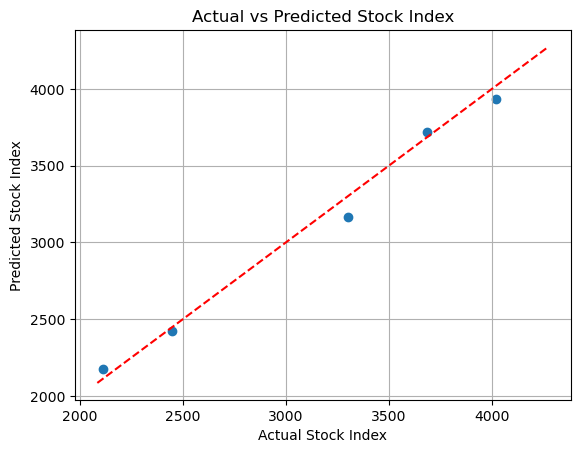

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Stock Index")
plt.ylabel("Predicted Stock Index")
plt.title("Actual vs Predicted Stock Index")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()
